# What is the best way to predict fuel efficiency (MPG) using select features and machine learning models?

For this project, we will be looking into the relationship between horsepower and fuel efficiency across different car manufactures. Our data comes from the Auto MPG dataset from the UCI ML data repository. https://archive.ics.uci.edu/dataset/9/auto+mpg. We will be visualizing the data using histograms, boxplots, scatterplots, and correlation matrixes. We will also be modeling the data using k-means clustering, Gaussian mixture models, linear regression, decision tree, random forests, and gradient boosting models.

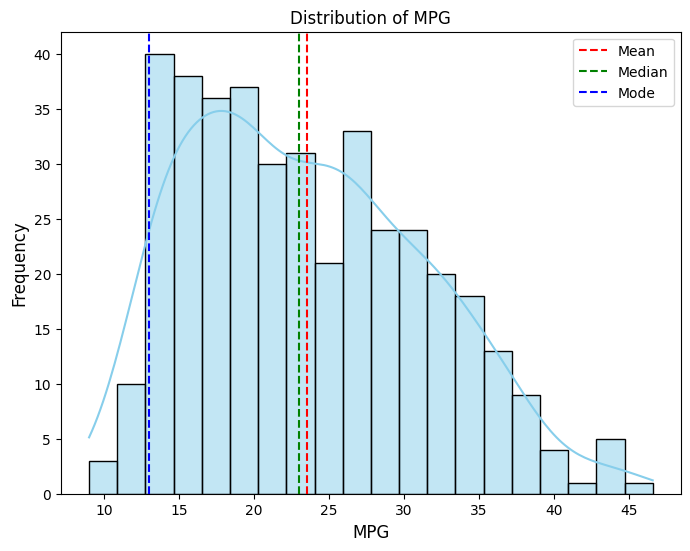

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.impute import SimpleImputer

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'model_year', 'origin', 'car_name']
auto = pd.read_csv("auto-mpg.data", header=None, sep='\s+', names=column_names)
auto['horsepower'] = auto['horsepower'].replace('?', np.nan)
auto['horsepower'] = auto['horsepower'].astype(float)

plt.figure(figsize=(8, 6))
sns.histplot(auto['mpg'], kde=True, bins=20, color='skyblue')
plt.title('Distribution of MPG')
plt.xlabel('MPG', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
mean_mpg = np.mean(auto['mpg'])
median_mpg = np.median(auto['mpg'])
mode_mpg = auto['mpg'].mode()[0]
plt.axvline(mean_mpg, color='red', linestyle='--', label='Mean')
plt.axvline(median_mpg, color='green', linestyle='--', label='Median')
plt.axvline(mode_mpg, color='blue', linestyle='--', label='Mode')
plt.legend()
plt.show()

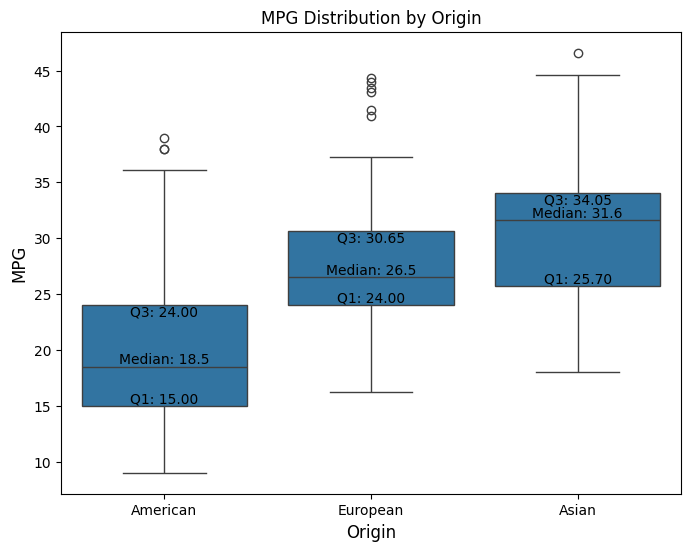

In [2]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='origin', y='mpg', data=auto)
plt.title('MPG Distribution by Origin')
plt.xlabel('Origin', fontsize = 12)
plt.ylabel('MPG', fontsize = 12)
plt.xticks([0, 1, 2], ['American', 'European', 'Asian'])
medians = auto.groupby('origin')['mpg'].median().values
for i in range(len(medians)):
    plt.text(i, medians[i], f'Median: {medians[i]}', ha='center', va='bottom', fontsize=10)
q1 = auto.groupby('origin')['mpg'].quantile(0.25)
q3 = auto.groupby('origin')['mpg'].quantile(0.75)
for i, (q1_val, q3_val) in enumerate(zip(q1, q3)):
    plt.text(i, q1_val, f'Q1: {q1_val:.2f}', ha='center', va='bottom', fontsize=10)
    plt.text(i, q3_val, f'Q3: {q3_val:.2f}', ha='center', va='top', fontsize=10)
plt.show()

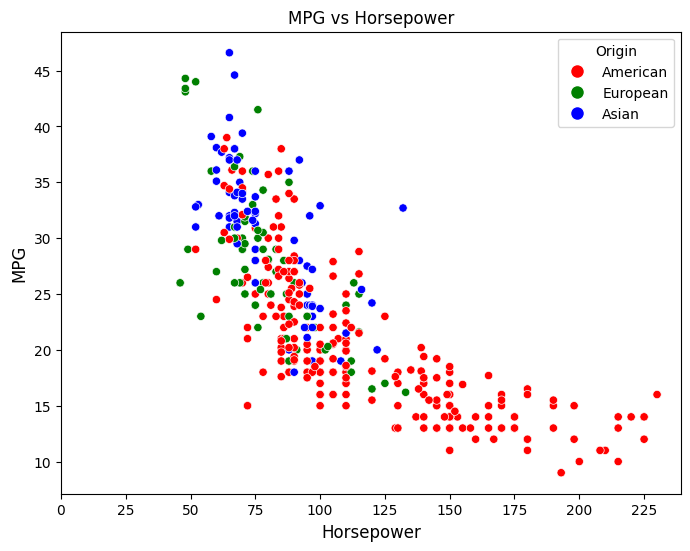

In [3]:
plt.figure(figsize=(8, 6))
custom_palette = {1: 'red', 2: 'green', 3: 'blue'}
sns.scatterplot(x='horsepower', y='mpg', hue = 'origin', palette=custom_palette, data=auto)
plt.title('MPG vs Horsepower')
plt.xlabel('Horsepower', fontsize = 12)
plt.ylabel('MPG', fontsize = 12)
plt.xticks(range(0, int(auto['horsepower'].max())+1, 25))
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in custom_palette.values()]
labels = ['American', 'European', 'Asian']
plt.legend(handles, labels, title='Origin')
plt.show()

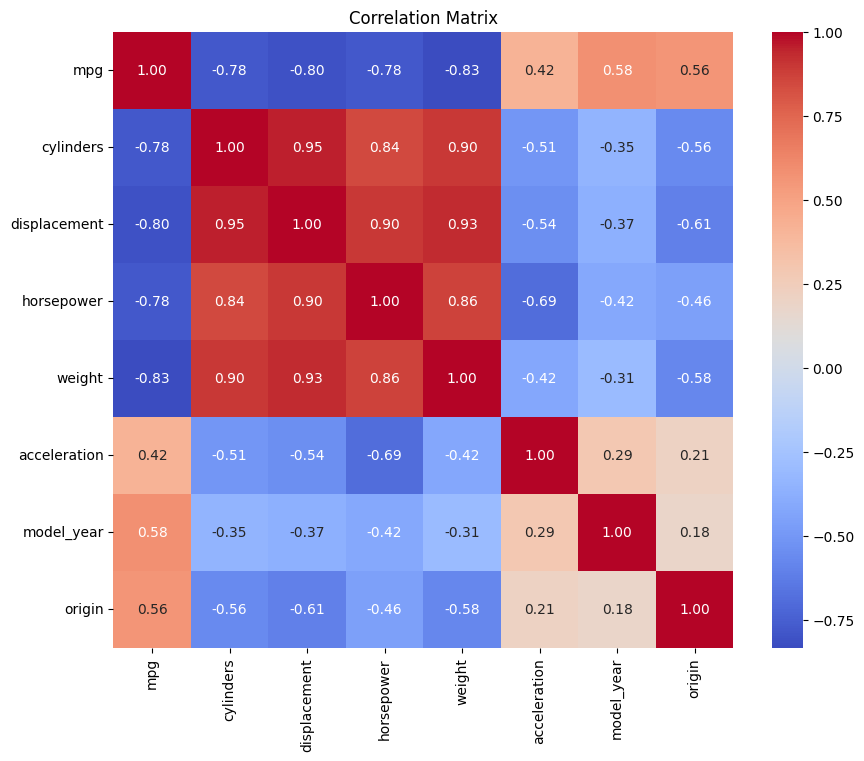

In [4]:
auto_numeric = auto.drop(columns=['car_name'])
correlation_matrix = auto_numeric.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

For 2 clusters:
Silhouette Score: 0.45518385495919234
Davies-Bouldin Index: 0.7737333370876531
-------------------
For 3 clusters:
Silhouette Score: 0.32269072969165075
Davies-Bouldin Index: 1.0989785057747141
-------------------
For 4 clusters:
Silhouette Score: 0.26385626782757876
Davies-Bouldin Index: 1.2784718250679123
-------------------
For 5 clusters:
Silhouette Score: 0.2777322092029805
Davies-Bouldin Index: 1.3611634070141923
-------------------
Optimal number of clusters:  2


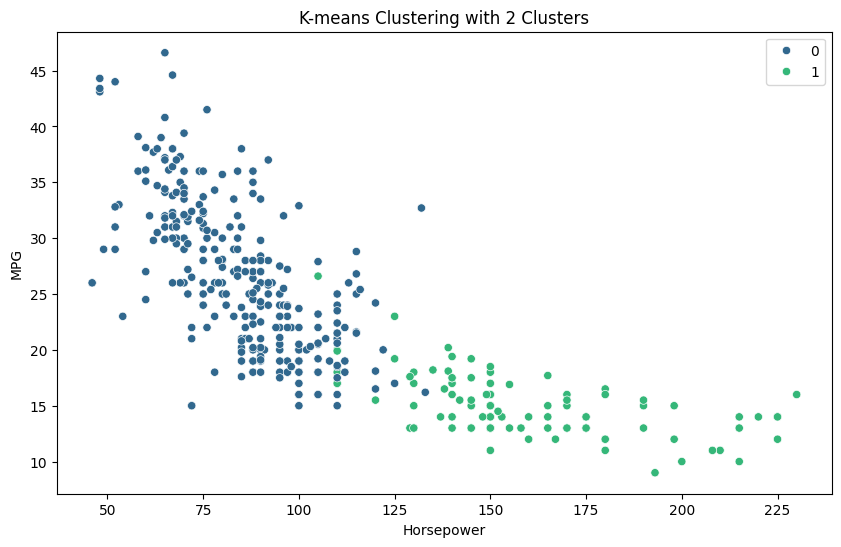

In [5]:
X = auto.drop(['mpg', 'car_name'], axis=1)

# Impute missing values
X = X.fillna(X.median())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

silhouette_scores = []
davies_bouldin_indices = []

# Iterate over different numbers of clusters
for n_clusters in range(2, 6):
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    clusters = kmeans.fit_predict(X_scaled)
    
    # Compute silhouette score and Davies-Bouldin index
    silhouette = silhouette_score(X_scaled, clusters)
    davies_bouldin = davies_bouldin_score(X_scaled, clusters)
    
    # Append scores to lists
    silhouette_scores.append(silhouette)
    davies_bouldin_indices.append(davies_bouldin)
    
    print(f"For {n_clusters} clusters:")
    print(f"Silhouette Score: {silhouette}")
    print(f"Davies-Bouldin Index: {davies_bouldin}")
    print("-------------------")

# Choose the optimal number of clusters based on the evaluation metrics
best_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2  # Index of the maximum silhouette score

# Perform K-means clustering with the best number of clusters
best_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
best_clusters = best_kmeans.fit_predict(X_scaled)

print("Optimal number of clusters: ", best_n_clusters)
# Visualize the clustering results
plt.figure(figsize=(10, 6))
sns.scatterplot(x='horsepower', y='mpg', data=auto, hue=best_clusters, palette='viridis', legend='full')
plt.title(f'K-means Clustering with {best_n_clusters} Clusters')
plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.show()

In [6]:
# Drop the car_name column
auto_numeric = auto.drop(['car_name'], axis=1)

# Drop rows with missing values
auto_numeric.dropna(inplace=True)

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(auto_numeric.drop('mpg', axis=1))

mselist = []
rsqlist = []

for n_components in range(2, 7):
    gmm = GaussianMixture(n_components=n_components, random_state=42)
    clusters = gmm.fit_predict(X_scaled)

    auto_numeric['cluster'] = clusters

    X_train, X_test, y_train, y_test = train_test_split(auto_numeric.drop('mpg', axis=1), auto_numeric['mpg'], test_size=0.2, random_state=42)

    models = {}
    for cluster_label in auto_numeric['cluster'].unique():
        # Filter data points belonging to the current cluster
        X_train_cluster = X_train[X_train['cluster'] == cluster_label].drop('cluster', axis=1)
        y_train_cluster = y_train[X_train['cluster'] == cluster_label]
    
        # Train linear regression model
        model = LinearRegression()
        model.fit(X_train_cluster, y_train_cluster)
    
        models[cluster_label] = model
    
    # Predict MPG for test data
    y_pred = []
    for index, row in X_test.iterrows():
        cluster_label = row['cluster']
        model = models[cluster_label]
        X_test_cluster = row.drop('cluster')
        
        X_test_cluster_df = pd.DataFrame([X_test_cluster], columns=X_train.columns[:-1])
    
        y_pred.append(model.predict(X_test_cluster_df)[0])


    # Evaluate the model
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    mselist.append(mse)
    rsqlist.append(r2)
    
    print("Number of Components:", n_components)
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared score: {r2}")
    print("-------------------")

bestrsq = rsqlist.index(max(rsqlist)) + 2 
print("Optimal number of components: ", bestrsq)

Number of Components: 2
Mean Squared Error: 7.81445623559716
R-squared score: 0.8468971994525789
-------------------
Number of Components: 3
Mean Squared Error: 8.276797841833643
R-squared score: 0.8378388859128666
-------------------
Number of Components: 4
Mean Squared Error: 8.171691774600214
R-squared score: 0.8398981505325416
-------------------
Number of Components: 5
Mean Squared Error: 7.8842567303801605
R-squared score: 0.845529650526757
-------------------
Number of Components: 6
Mean Squared Error: 9.028169797564487
R-squared score: 0.8231178167550208
-------------------
Optimal number of components:  2


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_selector as selector

X = auto.drop(['mpg', 'car_name'], axis=1)
y = auto['mpg']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

numerical_features = selector(dtype_include=['float64', 'int64'])(X)
categorical_features = selector(dtype_include=['object'])(X)

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

from sklearn.metrics import mean_squared_error

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])
    
    pipeline.fit(X_train, y_train)
    
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"{name} Mean Squared Error: {mse}")

Linear Regression Mean Squared Error: 8.19815098955517
Decision Tree Mean Squared Error: 11.802875000000002
Random Forest Mean Squared Error: 5.123830187499999
Gradient Boosting Mean Squared Error: 5.438059319671776


In conclusion, we have learned that the best way to predict MPG using select features and machine learning models is by using the random forest model. The linear regression model didn't work well because the data did not have a linear relationship. The decision tree model did not work well because they can create complex decision boundaries, which can lead to capturing variation in the data, rather than the underlying patterns. One way I could have improved my models is to implement cross-validation, using methods such as stratified k-fold cross-validation or time-series cross-validation.